In [3]:
import pickle
import os
import sys

sys.path.append(os.path.abspath("../../"))

from preprocesingScripts.bicycles.bicyclesAcquisition_2 import BicyclesAcq

# Lectura de datos
Cómo ya se han leido de forma previa no hace falta hcerlo de nuevo

In [4]:
with open("../../data/bicycles/df_bicycles_raw_per_year.pk1", "rb") as f:
    dfs_per_directory = pickle.load(f)

# Limpieza de datos
- 

In [5]:
years = ["2022", "2023", "2024"]

df_bicycles_preprocesed = BicyclesAcq(years).clean_data_dfs(
    dfs=dfs_per_directory
)

df_bicycles_preprocesed.df_data.to_pickle("../../data/bicycles/df_bicycles_preprocesed.pk1")


		 --- Grouping, cleaning and analisys data ---


>>>>> Analisys for 2022 <<<<<

		 --- Basic info ---

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object
          start_lat     start_lng       end_lat       end_lng
count  5.667717e+06  5.667717e+06  5.661859e+06  5.661859e+06
mean   4.190222e+01 -8.764783e+01  4.190242e+01 -8.764790e+01
std    4.626109e-02  2.999925e-02  6.805821e-02  1.082985e-01
min    4.164000e+01 -8.784000e+01  0.000000e+00 -8.814000e+01
25%    4.188103e+01 -8.766154e+01  4.188103e+01 -8.766260e+01
50%    4.190000e+01 -8.764410e+01  4.190000e+01 -8.764414e+01
75%    4.193000e+01 -8.762957e+01  4.193000e+01 -8.762963

Se observan los datos

In [7]:
with open("../../data/bicycles/df_bicycles_preprocesed.pk1", "rb") as f:
    df_bicycles = pickle.load(f)
    
df_bicycles['started_at'].max()

Timestamp('2024-05-31 23:59:47')

In [8]:
df = df_bicycles.set_index('started_at')

# Contar viajes por hora
viajes_por_hora = df.resample('H').size().reset_index(name='num_viajes')

print(viajes_por_hora)

C:\Users\burvu\AppData\Local\Temp\ipykernel_20232\2547969777.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  viajes_por_hora = df.resample('H').size().reset_index(name='num_viajes')


               started_at  num_viajes
0     2022-01-01 00:00:00         155
1     2022-01-01 01:00:00         242
2     2022-01-01 02:00:00         173
3     2022-01-01 03:00:00          50
4     2022-01-01 04:00:00          21
5     2022-01-01 05:00:00          18
6     2022-01-01 06:00:00          31
7     2022-01-01 07:00:00          73
8     2022-01-01 08:00:00          70
9     2022-01-01 09:00:00          92
10    2022-01-01 10:00:00         126
11    2022-01-01 11:00:00         157
12    2022-01-01 12:00:00         173
13    2022-01-01 13:00:00          98
14    2022-01-01 14:00:00          62
15    2022-01-01 15:00:00          38
16    2022-01-01 16:00:00          30
17    2022-01-01 17:00:00          27
18    2022-01-01 18:00:00          29
19    2022-01-01 19:00:00          25
20    2022-01-01 20:00:00          19
21    2022-01-01 21:00:00          17
22    2022-01-01 22:00:00          15
23    2022-01-01 23:00:00          18
24    2022-01-02 00:00:00          11
25    2022-0

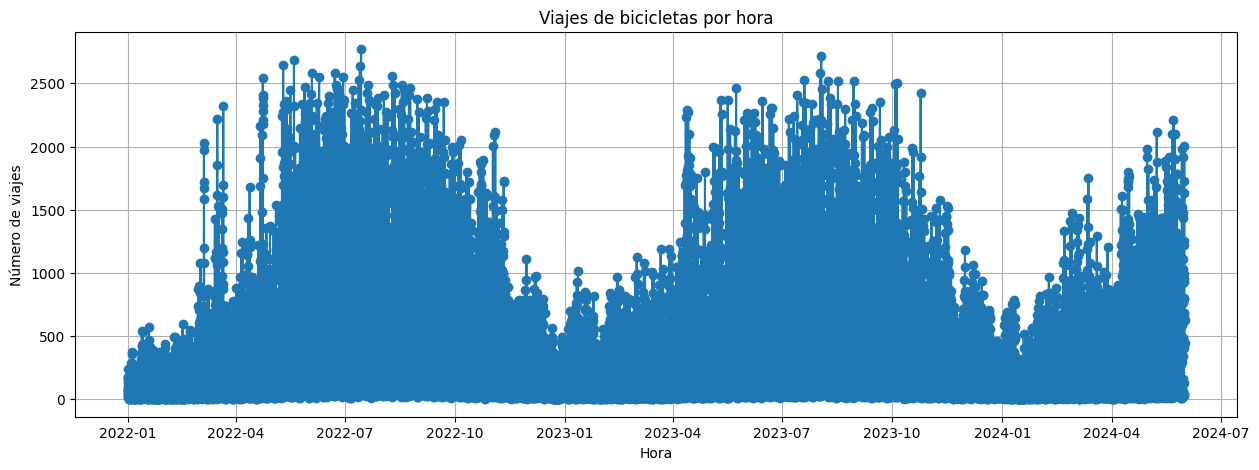

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(viajes_por_hora['started_at'], viajes_por_hora['num_viajes'], marker='o')
plt.xlabel('Hora')
plt.ylabel('Número de viajes')
plt.title('Viajes de bicicletas por hora')
plt.grid(True)
plt.show()